# Linear regression
## From "Exercises in linear regression.ipynb" February 12, 2025
The hand-in exercises for this topic is Exercise 1 and 2 from the notebook “Exercises in
linear regression.ipynb”.

# Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import linear_model
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [88]:
df = pd.read_csv("..\\data\\EnergyEfficiency.csv")
df 

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## 1.1 Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.

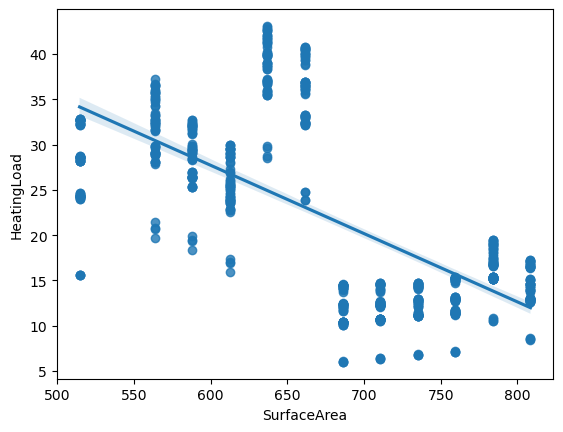

In [89]:
sns.regplot(data=df, x='SurfaceArea', y='HeatingLoad')
plt.show()
#strong negative correlation, two visibly distinct groups.

## 1.2 Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?

The Pearson correlation coeficient between `SurfaceArea` and `HeatingLoad` indicates there is a strong negative linear relationship.
As one increases the other tends to decrease.
<br>
As for the statistical significance, a typical significance level is considered to be 0.05. The null hypothesis is that there is no linear relationship between the variables.
<br> Our p-value is well below the significance level and very close to zero. 
<br>Thus it is very unlikely that this relationship happens by random chance. 
<br>We reject our null hypothesis.

In [90]:
stat, pval= pearsonr(df['SurfaceArea'], df['HeatingLoad'])
print(f'Pearson correlation test: \n   Pearson correlation coefficient {stat}\n   p-value: {pval} \n')


Pearson correlation test: 
   Pearson correlation coefficient -0.6581202267776216
   p-value: 1.6869072902148853e-96 



## 1.3 Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?

As we initially noted, there is seems to be two distinct groups in the regplot. This is an indication that the data is influenced by a underlying factor, not visible to us when only analyzing `SurfaceArea` and `HeatingLoad`.
The hue displays clearly the two distinct groups in our data is due to we are not taking into consideration that houses has different height and this too affects the heatingload.

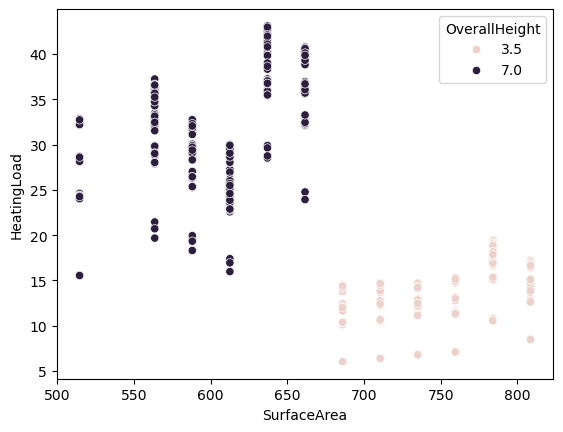

In [91]:
#showing the OverallHeight of the houses, lets us see that there is two clusters inside the correlation
sns.scatterplot(data=df, x='SurfaceArea', y='HeatingLoad', hue='OverallHeight')
plt.show()


## 1.4 Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).

In [92]:

#We define SurfaceArea as X and HeatingLoad as Y
X = df['SurfaceArea']
Y = df['HeatingLoad']

In [93]:
#Adding the intercept
X = sm.add_constant(X)

In [94]:
#Fitting the linear regression model using OLS
linreg_model = sm.OLS(Y, X).fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           1.69e-96
Time:                        12:31:52   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1.5 What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
intercept = 72.9454
The intercept is the point where the regression line crosses the y-axis.
For our case this is the expected `HeatingLoad`, when the `SurfaceArea` is zero (which of course does not really make sense)
Slope = -0.0754	
The slope of the regression line is -0.0754, which tells us when `SurfaceArea` goes up by 1 unit  `HeatingLoad` will drop by 0.0754.
This of course also makes little sense, as it indicates the bigger a house is, the less you have to heat it.
 


## 1.6 Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.

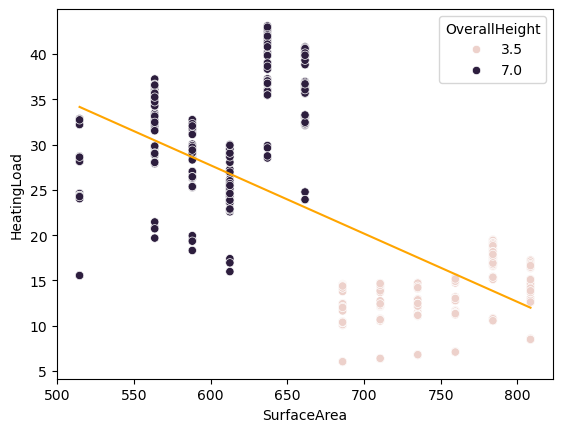

In [95]:
#retriving coefficeint and plotting the fitted regression line

#display the slope and y-intercept
linreg_model.params 


#use the params to calc prediction for each point on the original DF's surface area
pred_y = linreg_model.params["const"] + linreg_model.params["SurfaceArea"]*df["SurfaceArea"]

sns.scatterplot(data=df, x='SurfaceArea', y='HeatingLoad', hue='OverallHeight')
plt.plot(df['SurfaceArea'], pred_y, color = "orange")
plt.show()



## 1.7 Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

We choose R-Squared, Mean Absolute Error and Root Mean Square to evaluate the performance of our linear regression model.

R2: 0.4331222328938281
The value means 43,33% of the variance in  `HeatingLoad` can be explained by `SurfaceArea`. <br>
Meaning around 57% of the value of `HeatingLoad` is explained by other factors and thus not covered by our model.

MAE: 6.002338517195696
This measures the avg. magnitude of the errors between predicted values and actual values regardless of their postive/negative direction.
Meaning on average predictions are off by 6 from the actual value.

RMSE: 7.592090475900787
This helps us understand the magnitude of the errors. It gives weight to larger errors and good to use when the magnitude of errors are important to measure.
For our case the RMSE being larger than the MAE means there are some larger errors with our predictions.

In [96]:
linreg_model_sk = linear_model.LinearRegression()

In [97]:
X_no_int = df[["SurfaceArea"]]
linreg_model_sk.fit(X_no_int, Y)
linreg_model_sk.coef_

array([-0.07538716])

In [98]:
y_pred_sk = linreg_model_sk.predict(X_no_int)

r2 = r2_score(Y, y_pred_sk)

mae = mean_absolute_error(Y, y_pred_sk)
rmse = root_mean_squared_error(Y, y_pred_sk)


In [99]:
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.4331222328938281
Mean Absolute Error (MAE): 6.002338517195696
Root Mean Squared Error (RMSE): 7.592090475900787


# Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

## 2.1 Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.

We'll pick `RoofArea` and `OverallHeight` together with `HeatingLoad`

In [100]:
X = df[['RoofArea', 'OverallHeight']]
y = df['HeatingLoad']
linreg_model = linear_model.LinearRegression()
linreg_model.fit(X, y)

y_pred = linreg_model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.791270389235786
Mean Absolute Error (MAE): 3.5139989735345423
Root Mean Squared Error (RMSE): 4.606899036134472


In [101]:
linreg_model = sm.OLS(Y, X).fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            HeatingLoad   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.039e+04
Date:                Sat, 08 Mar 2025   Prob (F-statistic):                        0.00
Time:                        12:31:52   Log-Likelihood:                         -2264.4
No. Observations:                 768   AIC:                                      4533.
Df Residuals:                     766   BIC:                                      4542.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
RoofArea         -0.0146      0.002     -8.581      0.000      -0.018      -0.011
OverallHeight     4.7419      0.056     84.636      0.000       4.632       4.852
==============================================================================
Omnibus:                       13.449   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.442
Skew:                          -0.082   Prob(JB):                     1.34e-05
Kurtosis:                       3.821   Cond. No.                         61.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.2 Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?


Shortly, yes.

The longer answer will have to touch on how picking `OverallHeight` and `RoofArea` as our feature variables help to explain about 79.1% of the variance seen in `HeatingLoad`.
Moreover it does this with higher accuracy, precision and performance as seen by our evaluation metrics R2, MAE and RMSE.